## **Importing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE

## **Data Exploration**

In [ ]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
print("Shape:", df.shape)

Shape: (100000, 9)


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
53738,Female,20.0,0,0,never,32.71,4.8,90,0
47377,Female,30.0,0,0,never,27.82,5.0,80,0
51905,Female,80.0,1,0,never,21.97,5.7,155,1
15444,Female,47.0,0,0,No Info,27.32,6.5,160,0
4149,Female,42.0,0,0,never,22.00,3.5,158,0


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df.nunique()

,0
gender,3
age,102
hypertension,2
heart_disease,2
smoking_history,6
bmi,4247
HbA1c_level,18
blood_glucose_level,18
diabetes,2


In [ ]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 3854


## **Data Cleaning**

In [ ]:
df = df.drop_duplicates()

cat_cols = ['gender', 'smoking_history']
for col in cat_cols:
    df[col] = df[col].astype('category')


In [ ]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [ ]:
df.shape

(96146, 9)

In [ ]:
df.dtypes


,0
gender,category
age,float64
hypertension,int64
heart_disease,int64
smoking_history,category
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


## **Data Visualization**

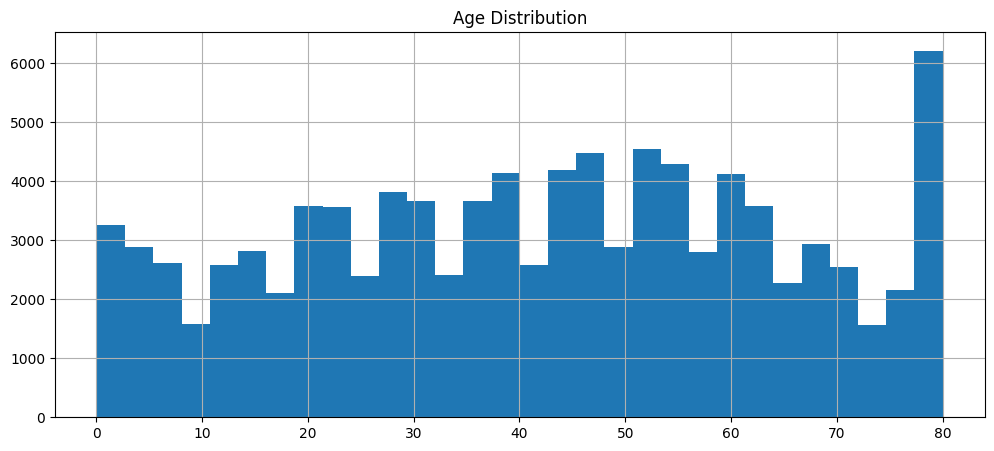

In [ ]:
plt.figure(figsize=(12,5))
df['age'].hist(bins=30)
plt.title("Age Distribution")
plt.show()


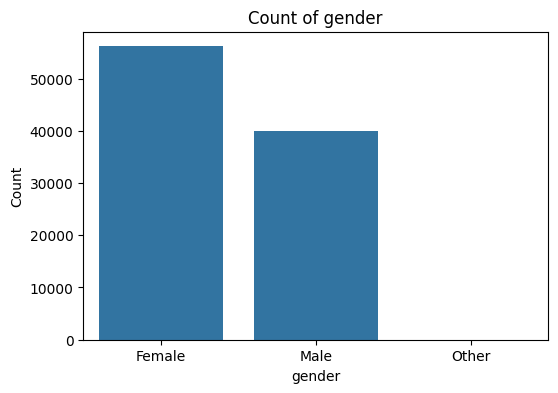

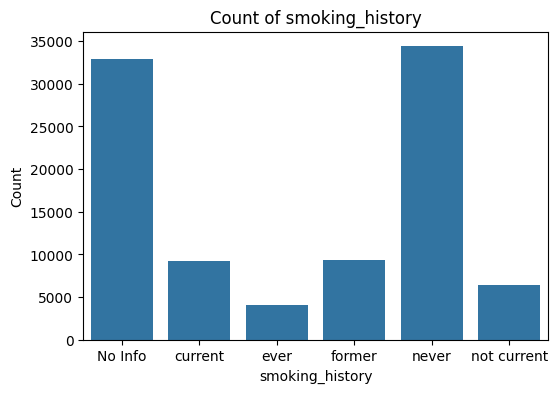

In [ ]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

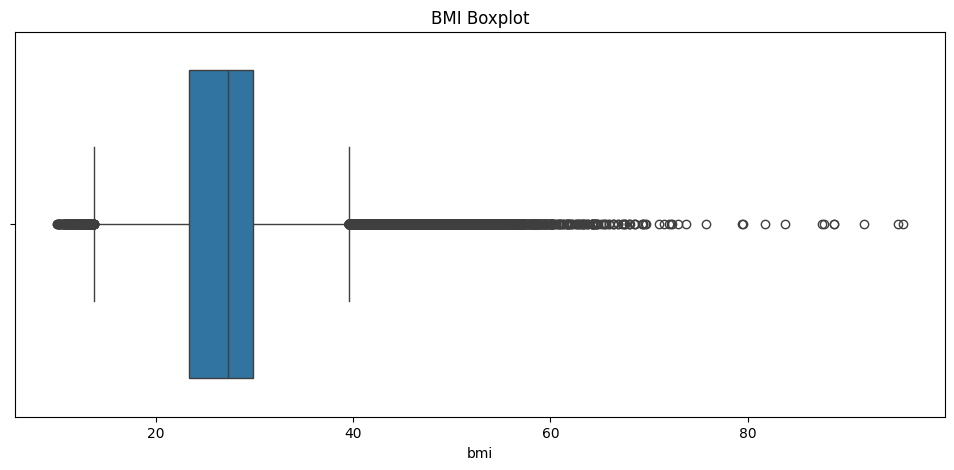

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df['bmi'])
plt.title("BMI Boxplot")
plt.show()

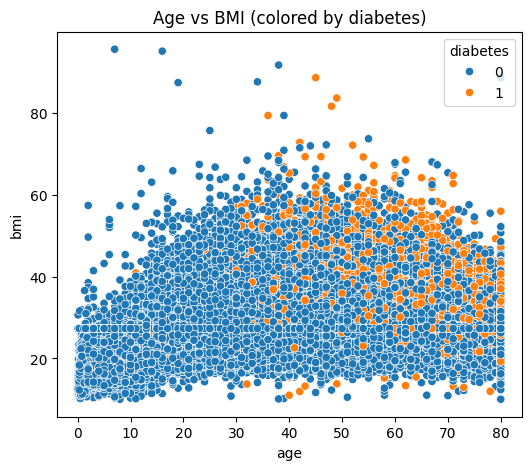

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='age', y='bmi', hue='diabetes')
plt.title("Age vs BMI (colored by diabetes)")
plt.show()

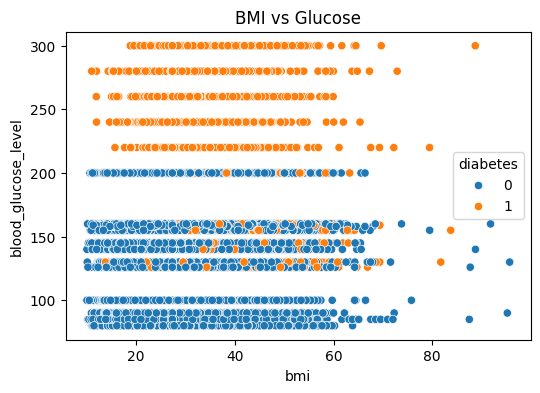

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="bmi", y="blood_glucose_level", hue="diabetes", data=df)
plt.title("BMI vs Glucose")
plt.show()

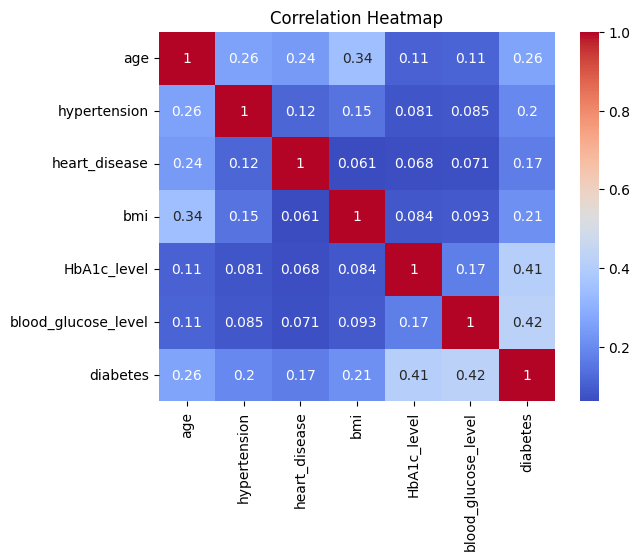

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## **Feature Engineering & Preprocessing**

In [ ]:
df_encoded = df.copy()
label_cols = ['gender', 'smoking_history']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])



In [ ]:
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

selected_features = importances.head(5).index.tolist()
print("\nSelected Features:", selected_features)

X_selected = X[selected_features]


HbA1c_level            0.395887
blood_glucose_level    0.318824
bmi                    0.123821
age                    0.102636
smoking_history        0.027672
hypertension           0.015569
heart_disease          0.009344
gender                 0.006247
dtype: float64

Selected Features: ['HbA1c_level', 'blood_glucose_level', 'bmi', 'age', 'smoking_history']


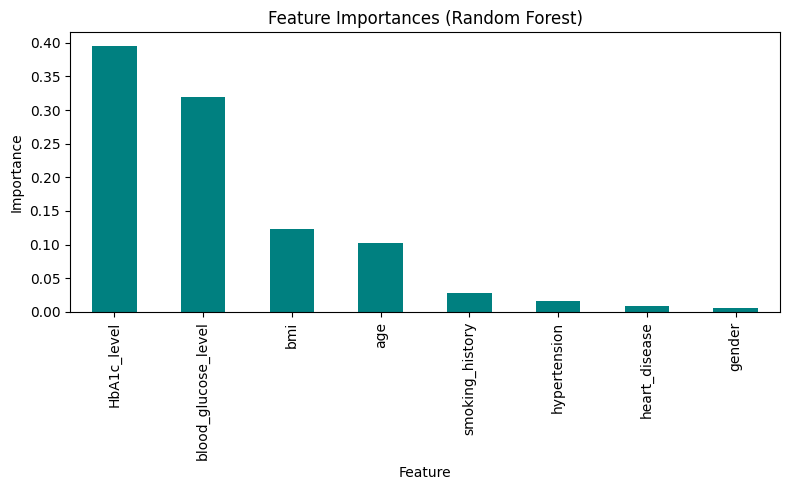

In [ ]:
plt.figure(figsize=(8,5))
importances.plot(kind='bar', color='teal')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


## **Split Data**

In [ ]:
X_final = X_selected
y_final = y

# Train / Temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X_final, y_final,
    test_size=0.3,
    random_state=42,
    stratify=y_final
)

# Validation / Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (67302, 5)
Validation shape: (14422, 5)
Test shape: (14422, 5)


## **Scaling & Smote**

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print("Original:", Counter(y_train))

target_minority = 10000

n_min = sum(y_train == 1)
n_maj = sum(y_train == 0)

max_minority = min(target_minority, n_maj)

sampling_ratio = max_minority / n_maj

sm = SMOTE(sampling_strategy=sampling_ratio, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Counts after SMOTE:", Counter(y_train_res))
print("Train after SMOTE:", X_train_res.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)


Original: Counter({0: 61365, 1: 5937})
Counts after SMOTE: Counter({0: 61365, 1: 10000})
Train after SMOTE: (71365, 5)
Val: (14422, 5)
Test: (14422, 5)


In [ ]:
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## **Model Selection**

In [ ]:
# Model 1: Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_res, y_train_res)

y_val_pred_log = log_model.predict(X_val)

val_acc_log = accuracy_score(y_val, y_val_pred_log)
print("Logistic Regression - Validation Accuracy:", val_acc_log)
print(classification_report(y_val, y_val_pred_log))


Logistic Regression - Validation Accuracy: 0.9505616419359312
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     13149
           1       0.76      0.65      0.70      1273

    accuracy                           0.95     14422
   macro avg       0.86      0.81      0.84     14422
weighted avg       0.95      0.95      0.95     14422



In [ ]:
#DecisionTree # Model 2
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)

y_val_pred_dt = dt_model.predict(X_val)
print("Decision Tree - Validation Accuracy:", accuracy_score(y_val, y_val_pred_dt))
print(classification_report(y_val, y_val_pred_dt))



Decision Tree - Validation Accuracy: 0.9464706698100125
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     13149
           1       0.68      0.74      0.71      1273

    accuracy                           0.95     14422
   macro avg       0.83      0.85      0.84     14422
weighted avg       0.95      0.95      0.95     14422



In [ ]:
#RandomForest # Model 3
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

y_val_pred_rf = rf_model.predict(X_val)
print("Random Forest - Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print(classification_report(y_val, y_val_pred_rf))



Random Forest - Validation Accuracy: 0.9647066981001248
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13149
           1       0.90      0.67      0.77      1273

    accuracy                           0.96     14422
   macro avg       0.93      0.83      0.88     14422
weighted avg       0.96      0.96      0.96     14422



In [ ]:
rf_balanced = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf_balanced.fit(X_train_res, y_train_res)

y_val_pred_bal = rf_balanced.predict(X_val)

val_acc_bal = accuracy_score(y_val, y_val_pred_bal)
print("Random Forest (class_weight='balanced') - Validation Accuracy:", val_acc_bal)
print(classification_report(y_val, y_val_pred_bal))


Random Forest (class_weight='balanced') - Validation Accuracy: 0.9647760366107336
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13149
           1       0.90      0.67      0.77      1273

    accuracy                           0.96     14422
   macro avg       0.94      0.83      0.88     14422
weighted avg       0.96      0.96      0.96     14422



In [ ]:
y_val_probs = rf_balanced.predict_proba(X_val)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)

best_f1 = 0
best_threshold = 0
f1_scores = []

for thr in thresholds:
    y_val_pred_thr = (y_val_probs >= thr).astype(int)
    f1 = f1_score(y_val, y_val_pred_thr, pos_label=1)
    f1_scores.append(f1)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thr

print(f"Best threshold for class 1: {best_threshold}")
print(f"Best F1-score for class 1: {best_f1}")


Best threshold for class 1: 0.8899999999999996
Best F1-score for class 1: 0.7876190476190477


In [ ]:
threshold = 0.89
y_val_pred = (y_val_probs >= threshold).astype(int)

val_acc = accuracy_score(y_val, y_val_pred)
print("Random Forest - Validation Accuracy :", val_acc)
print(classification_report(y_val, y_val_pred))



Random Forest - Validation Accuracy : 0.9690750242684787
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13149
           1       1.00      0.65      0.79      1273

    accuracy                           0.97     14422
   macro avg       0.98      0.82      0.89     14422
weighted avg       0.97      0.97      0.97     14422



## **Model Training**

In [ ]:
X_train_final = np.concatenate([X_train, X_val], axis=0)
y_train_final = np.concatenate([y_train, y_val], axis=0)

In [ ]:
rf_final = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
)
rf_final.fit(X_train_final, y_train_final)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_test_probs = rf_final.predict_proba(X_test.values)[:, 1]
threshold = 0.89
y_test_pred = (y_test_probs >= threshold).astype(int)

In [ ]:
test_acc = accuracy_score(y_test, y_test_pred)
print("Random Forest - Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))


Random Forest - Test Accuracy: 0.9730273193731799
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13150
           1       1.00      0.69      0.82      1272

    accuracy                           0.97     14422
   macro avg       0.99      0.85      0.90     14422
weighted avg       0.97      0.97      0.97     14422



## **Model Evaluation**

In [ ]:
accuracy  = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, zero_division=0)
recall    = recall_score(y_test, y_test_pred, zero_division=0)
f1        = f1_score(y_test, y_test_pred, zero_division=0)
roc_auc   = roc_auc_score(y_test, y_test_probs)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))


Accuracy : 0.9730
Precision: 1.0000
Recall   : 0.6942
F1-score : 0.8195
ROC-AUC  : 0.9638

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13150
           1       1.00      0.69      0.82      1272

    accuracy                           0.97     14422
   macro avg       0.99      0.85      0.90     14422
weighted avg       0.97      0.97      0.97     14422



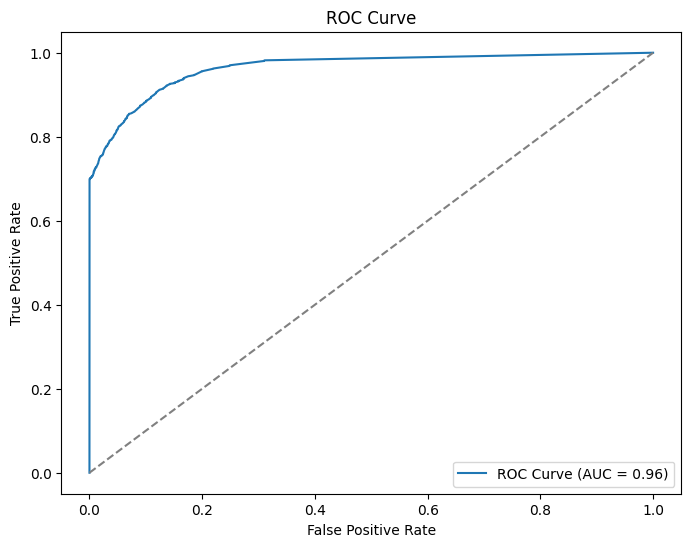

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## **Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid = GridSearchCV(
    rf,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)
best_rf = grid.best_estimator_
best_rf.fit(X_train, y_train)


Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.7880437663200202


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
y_proba = best_rf.predict_proba(X_test)[:, 1]
threshold =  0.68
y_pred_thresh = (y_proba >= threshold).astype(int)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_thresh))


Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13150
           1       0.98      0.70      0.82      1272

    accuracy                           0.97     14422
   macro avg       0.98      0.85      0.90     14422
weighted avg       0.97      0.97      0.97     14422



In [ ]:
print('Train Accuracy : ' , best_rf.score(X_train , y_train))
print('Test Accuracy : ' , best_rf.score(X_test , y_test))

Train Accuracy :  0.9977860984814716
Test Accuracy :  0.969629732353349


## **Prediction**

In [ ]:
print("Predictions with threshold:", y_pred_thresh[:10])
print("True labels:", y_test[:10].values)

Predictions with threshold: [0 0 0 0 0 0 0 0 0 0]
True labels: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
print('unique values in y_test : ', np.unique(y_test , return_counts=True))

unique values in y_test :  (array([0, 1]), array([13150,  1272]))


## **Result & Interpretation**

In [ ]:
print(classification_report(y_test, y_pred_thresh))
print("Final Test Accuracy:", accuracy_score(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13150
           1       0.98      0.70      0.82      1272

    accuracy                           0.97     14422
   macro avg       0.98      0.85      0.90     14422
weighted avg       0.97      0.97      0.97     14422

Final Test Accuracy: 0.9723339342670919


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_thresh)
TN, FP, FN, TP = cm.ravel()

print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

classification_error = (FP + FN) / (TP + TN + FP + FN)
print(f"Classification Error: {classification_error:.4f}")

True Negatives: 13132
False Positives: 18
False Negatives: 381
True Positives: 891
Classification Error: 0.0277


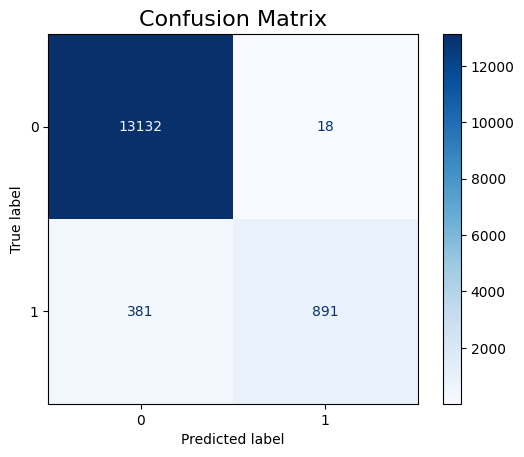

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_thresh)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix" , fontsize =16)
plt.show()

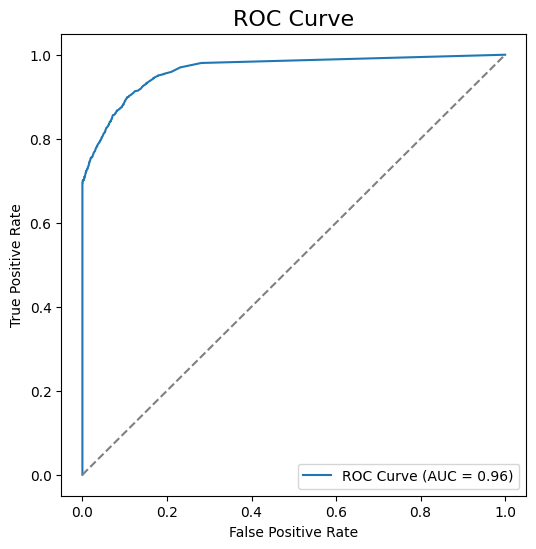

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",fontsize =16)
plt.legend()
plt.show()
